## Playing around with Neural Networks

**Can can you predict whether a wine is red or white by looking at its chemical properties?**

### Dataset 

**Description** Machine learning database wine quality datasets in both red and white

url: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names

### Package - Keras

Always go to the documentation. While I'll cover many areas of how/why the model is built, there are too many to cover in class. 

[Documentation for Keras](https://keras.io/)

[Guide to the Sequential Model](https://keras.io/getting-started/sequential-model-guide/)

In [4]:
# Import pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
%matplotlib inline
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [5]:
#What does our data look like?
print(white.shape)
print(red.shape)

(4898, 12)
(1599, 12)


In [6]:
# Let's look at our white wine
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Now our red 
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# I'm seeing some differences but lets look alittle more
white.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
#compared to red
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Time for some EDA

Let's look at the areas of interest
* Alcohol
* Sulphates
* Volatile acidity

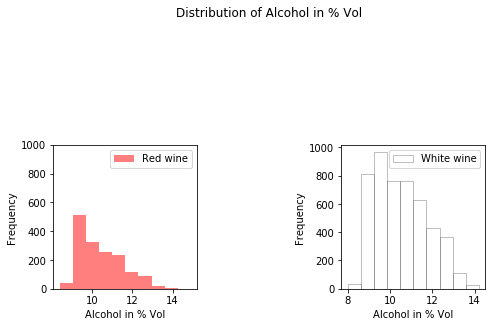

In [10]:
# Let's setup two subplots

fig, ax = plt.subplots(1, 2)

# A Histogram will shows us % alcohol against frequency
ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

#Sizes and labels
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


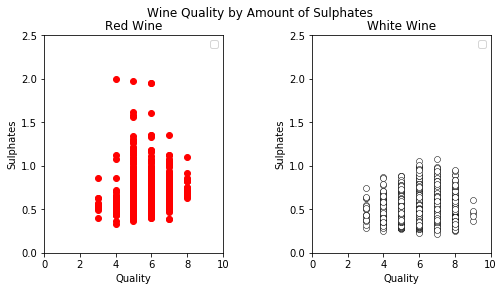

In [11]:
# What about the sulfates? Is there a tie-in with quality?


# Setting up two subplots again but I added some size criteria this time
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

#Scatterplot will drop in a value for each wines sulphates and values
#Color coding is always handy
ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

#Labels, legend and size limtis
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
ax[0].legend(loc='best')
ax[1].legend(loc='best')
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

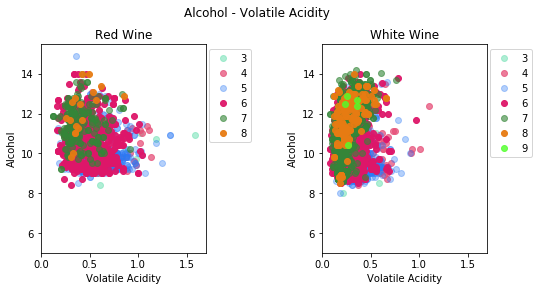

In [12]:
# Let's combine what we've seen so far with Volatile Acidity
# I'm using numpy to create some colors. I seeded it so we all get the same ones
np.random.seed(570)

# What does the rest of my code do?
redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])


fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

#### Now that we have our data - let's start processing it into what we need

* Create an identifier for red vs white wine
* Put them into the same list

In [13]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

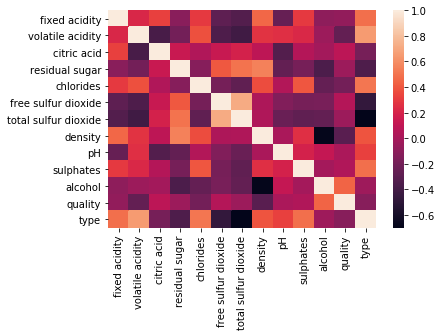

In [14]:
# Now that we have a response variable - let's look at some intial correlations

corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Let's do some modeling

* Create data and response variables
* Setup train vs test data

In [15]:
# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Aw man... now I'm remembering alot of my data is in various scales... time to standardize?

In [16]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [17]:
# Let's go through our machine learning process:
# Import `Sequential` from `keras.models` & `Dense` from `keras.layers`
from keras.models import Sequential


from keras.layers import Dense

Using TensorFlow backend.
/Users/greg/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/greg/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/greg/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/greg/anaconda3/lib/python3.7/site-packages/tensorflo

### Next we'll instantiate the model
* A type of network that performs well on classification problems is a problem is a multi-layer perceptron.
* We leave it empty at first because we're going to add layers to it
* To let the mode lknow what input shape to expect we'll pass input_shape, input_dim, input_length arguements
#### Dense Layers
* There are fully connected layers. Dense layers implement the following operation: output = activation(dot(input, kernel) + bias). Note that without the activation function, your Dense layer would consist only of two linear operations: a dot product and an addition.

#### Activation Functions

In short activation functions evaluate the "weight of sum" of a nuerons inputs, adds a bias then decideds if it should fire or not. I chose Relu here because it reduces computational load. Essentially it gives an output X if X is positive and 0. This can lead to lighter networks as many preceptrons are prevented from firing

[Great article on Activation Functions](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)

In [18]:
#Instantiate the model
model = Sequential()

# Add an input layer
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [19]:
# Let's look at the model we've just created
model.output_shape

(None, 1)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'

In [22]:
model.get_weights()

[array([[ 0.2896654 ,  0.01695609, -0.1637314 , -0.4055706 , -0.1897687 ,
          0.05104744, -0.4755298 ,  0.04375035,  0.149944  ,  0.18585712,
          0.04605234,  0.4203161 ],
        [ 0.09246093, -0.00486219,  0.15394145, -0.3556453 ,  0.37075537,
         -0.09201503,  0.22433394,  0.49172276,  0.02939814, -0.00528288,
         -0.28554958, -0.29101855],
        [ 0.13772285,  0.10540932, -0.16185051, -0.13713309, -0.30931568,
          0.2913708 ,  0.22610158, -0.03789827,  0.03900152, -0.13670495,
          0.02206749,  0.07224816],
        [ 0.12972063, -0.46136355, -0.1358273 , -0.03706533,  0.21573442,
          0.21198452, -0.02762926, -0.19320443,  0.24703926, -0.4224128 ,
          0.29690397, -0.07473344],
        [-0.06937274,  0.13956004, -0.04767117,  0.03820831,  0.27192348,
         -0.47782913, -0.09866273, -0.42932004, -0.04532751, -0.17295876,
         -0.3432657 ,  0.4816057 ],
        [ 0.06270897,  0.10312521,  0.34606183, -0.12457022, -0.16116223,
      

In [23]:
# Ok - lots of that out of the way to build the model and validate it
# Time to fit our model

#compiling lets us configure the model
# Question 1 - Why am I using this loss function? Remember our research question!
# Question 2 - Why am I using adam?
# Question 3 - What am I maximizing?
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

# An epoch is a single pass through the entire training set, followed by testing of the verification set. 
# Batch size defines the number of samples that going to be propagated through the network.
# Verbose? It gives us the cool status bar!

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0900 - accuracy: 0.9692
Epoch 2/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0221 - accuracy: 0.9959
Epoch 3/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0194 - accuracy: 0.9970
Epoch 4/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0165 - accuracy: 0.9970
Epoch 5/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0151 - accuracy: 0.9975
Epoch 6/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0142 - accuracy: 0.9970
Epoch 7/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0133 - accuracy: 0.9972
Epoch 8/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0149 - accuracy: 0.9972
Epoch 9/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0119 - accu

#### Question 1 answer - Binary is the key word

We're performing a binary classification problem - red vs white wine. With multiclass you can use categorical_crossentropy



#### Question 2 answer - You don't know that from adam! 

Adam was introduced in 2015 to take advantage of the strengths of both

* Adaptive Gradient Algorithm (AdaGrad)
* Root Mean Square Propagation (RMSProp)

In short Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

[Optimizers from Keras Documentation](https://keras.io/optimizers/)

[Read more about Adam](https://arxiv.org/abs/1412.6980v8)

[And because scientific papers may not be your jam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

In [24]:
# Time to make our predictions
y_pred = model.predict_classes(X_test)

In [25]:
# Generate our score - Based on loss and accuracy
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

2145/2145 [==============================] - 0s 54us/step
[0.027937207793992495, 0.9948717951774597]


In [26]:
# 2% loss & 99.39% accuracy! Not bad!
# let's remind our selves of other evaluation metrics



In [27]:
# Confusion matrix - Remember this shows us TP FP FN TN
confusion_matrix(y_test, y_pred)

array([[1587,    1],
       [  10,  547]])

In [28]:
# Precision - is a measure of exactness or accuracy TP/(TP+FP)
precision_score(y_test, y_pred)

0.9981751824817519

In [29]:
# Recall - Covers completeness TP/(TP+FN)
recall_score(y_test, y_pred)

0.9820466786355476

In [30]:
# F1 score - the harmonic mean of precision and sensitivity 2*TP/(2*TP + FN + FP)
f1_score(y_test,y_pred)

0.9900452488687783

In [31]:
# Cohen's kappa - This is a new one
# Covers the classification accuracy normalized by the imbalance of the classes in the data
# Remember we had more white than red wine or bias in our data
cohen_kappa_score(y_test, y_pred)

0.9865918682906067